In [1]:
%matplotlib inline
import gridmet_cfsv2 as gm
from numpy.core.numeric import True_
import grd2shp
import geopandas as gpd


gm_vars = ['air_temperature',
           'air_temperature',
           'precipitation_amount',
           'specific_humidity']
m = gm.Gridmet(type=3)


ds = m.tmax


ds.load()



[WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_00_1_0_0.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_06_1_0_1.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_12_1_0_2.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_18_1_0_3.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_00_2_0_4.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_06_2_0_5.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_12_2_0_6.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_18_2_0_7.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_00_3_0_8.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_06_3_0_9.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_12_3_0_10.nc'), WindowsPath('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx

<xarray.Dataset>
Dimensions:          (crs: 1, day: 32, lat: 585, lon: 1386, time: 48)
Coordinates:
  * day              (day) datetime64[ns] 2021-07-25 2021-07-26 ... 2021-08-25
  * lat              (lat) float64 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * crs              (crs) int16 3
  * lon              (lon) float64 -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
Dimensions without coordinates: time
Data variables:
    air_temperature  (time, day, lat, lon) float32 nan nan nan ... nan nan nan
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       26 July 2021
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    last_permanent_slice:       0
    last_early_slice:           30
    last_provisional_slice:     24
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [2]:
# import itertools
# fcst = ('00', '06', '12', '18')
# ensb = ('1', '2', '3', '4')
# day = ('0', '1', '2')
# for index, (tday, tensb, tfcst) in enumerate(itertools.product(day, ensb, fcst)):
#     print(tday, tensb, tfcst,  index)

In [19]:
day_dim = ds.dims['day']
print(day_dim)
ds.air_temperature[0:15, 0, :, :] = ds.air_temperature[32:47, 0, :, :]
ds.air_temperature[0:15, 1, :, :] = ds.air_temperature[16:31, 1, :, :]
ds.air_temperature[16:31, 0, :, :] = ds.air_temperature[32:47, 0, :, :]



32


In [4]:
import numpy as np
def plot_grid(ds, time, day):
    print(f'min: {np.nanmin(ds.air_temperature.isel(time=time, day=day))}')
    print(f'max: {np.nanmax(ds.air_temperature.isel(time=time, day=day))}')
    ds.air_temperature.isel(time=time, day=day).plot()

min: 280.70001220703125
max: 320.8999938964844


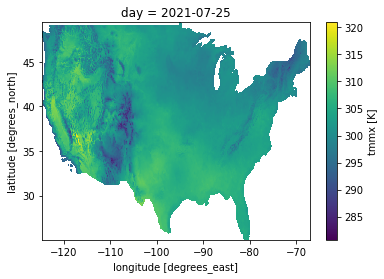

In [24]:
time = 0
day = 0
plot_grid(ds, time, day)

min: 282.5
max: 318.6000061035156


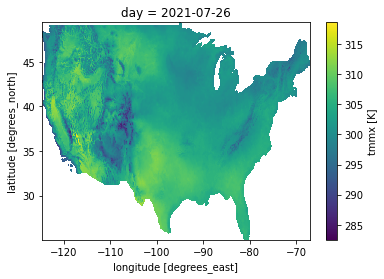

In [7]:
time = 13
day = 1
plot_grid(ds, time, day)

min: 282.0
max: 316.8999938964844


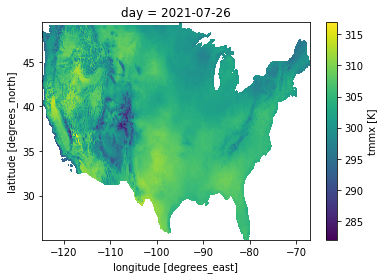

In [15]:
time = 31
day = 1
plot_grid(ds, time, day)

In [18]:
ds.air_temperature[16:31, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
ds.air_temperature[32:47, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
ds.air_temperature[32:47, day_dim-2, :, :] = ds.air_temperature[16:31, day_dim-2, :, :]

min: 280.8999938964844
max: 316.5


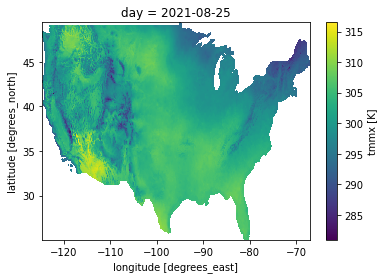

In [26]:
time = 0
day = 31
plot_grid(ds, time, day)

min: 280.8999938964844
max: 316.5


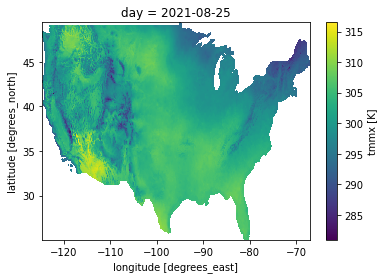

In [27]:
time = 16
day = 31
plot_grid(ds, time, day)

min: 280.70001220703125
max: 319.0


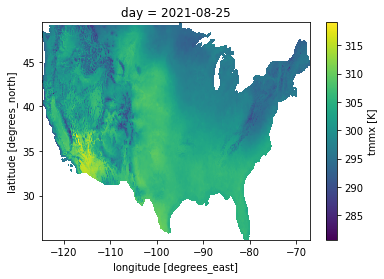

In [32]:
time = 46
day = 31
plot_grid(ds, time, day)

In [ ]:
time = 32
print(f'min: {np.nanmin(ds.air_temperature.isel(time=47, day=0))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=47, day=0))}')
ds.air_temperature.isel(time=47, day=0).plot()


In [ ]:
import numpy as np
print(f'min: {np.nanmin(ds.air_temperature.isel(time=47, day=0))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=47, day=0))}')
ds.air_temperature.isel(time=47, day=0).plot()

# ds.air_temperature.isel(time=16, day=0).plot()
# ds.air_temperature.isel(time=0, day=0).plot()

# ds.air_temperature.isel(time=16, day=1).plot()
# ds.air_temperature.isel(time=0, day=1).plot()



In [ ]:
print(f'min: {np.nanmin(ds.air_temperature.isel(time=16, day=0))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=16, day=0))}')
ds.air_temperature.isel(time=16, day=0).plot()

# ds.air_temperature.isel(time=16, day=0).plot()

In [ ]:
print(f'min: {np.nanmin(ds.air_temperature.isel(time=0, day=0))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=0, day=0))}')
ds.air_temperature.isel(time=0, day=0).plot()


In [ ]:
print(f'min: {np.nanmin(ds.air_temperature.isel(time=0, day=2))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=0, day=2))}')
ds.air_temperature.isel(time=0, day=2).plot()

In [ ]:
ds.air_temperature[16:31, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
ds.air_temperature[32:47, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
ds.air_temperature[32:47, day_dim-2, :, :] = ds.air_temperature[16:31, day_dim-2, :, :]

In [ ]:
print(f'min: {np.nanmin(ds.air_temperature.isel(time=0, day=31))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=0, day=31))}')
ds.air_temperature.isel(time=0, day=31).plot()

In [ ]:
print(f'min: {np.nanmin(ds.air_temperature.isel(time=16, day=31))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=16, day=31))}')
ds.air_temperature.isel(time=16, day=31).plot()

In [ ]:
print(f'min: {np.nanmin(ds.air_temperature.isel(time=16, day=31))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=16, day=31))}')
ds.air_temperature.isel(time=16, day=31).plot()

In [ ]:
print(f'min: {np.nanmin(ds.air_temperature.isel(time=17, day=31))}')
print(f'max: {np.nanmax(ds.air_temperature.isel(time=17, day=31))}')
ds.air_temperature.isel(time=17, day=31).plot()

In [ ]:

ds.air_temperature[16:31, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
ds.air_temperature[32:47, day_dim-1, :, :] = ds.air_temperature[0:15, day_dim-1, :, :]
ds.air_temperature[32:47, day_dim-2, :, :] = ds.air_temperature[16:31, day_dim-2, :, :]

In [ ]:
ds.air_temperature.isel(time=0, day=31).plot()
# %%
ds.air_temperature.isel(time=0, day=0).plot()

# %%
ds.air_temperature.isel(time=16, day=31).plot()
# %%
ds.air_temperature.isel(time=47, day=31).plot()
# %%
ds.air_temperature.isel(time=47, day=30).plot()

# %%
d_time = m.tmax.dims['time']

# %%
import numpy as np
np.nanmin(m.tmax.air_temperature[3,2,:,:].values)

# %%
%matplotlib inline
m.tmax.air_temperature.isel(time=0, day=2).plot()
# %%
m.tmax.air_temperature.load()
m.tmax.air_temperature[0:15, 0, :, :] = m.tmax.air_temperature[32:47, 0, :, :]

# %%
m.tmax.air_temperature.isel(time=0, day=0).plot()


# %%
ds1 = m.tmax
ds2 = m.tmin
ds3 = m.prcp
ds4 = m.wind_speed
ds5 = m.srad
ds6 = m.specific_humidity
# print(ds.head(), ds['air_temperature'].long_name)
# ds1 = xr.open_dataset('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_median.nc')
# ds2 = xr.open_dataset(r'C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmn_daily_median.nc')
gdf = gpd.read_file(r'C:/Users/rmcd/OneDrive - DOI/GitRepos/onhm-fetcher-parser/Data_v1_1/GFv1.1_simple.shp')
g2 = grd2shp.Grd2Shp()
# print(g2.initialize.__annotations__)
# ds2 = 0
pin = g2.initialize(
    grd=[ds1, ds2, ds3, ds4, ds5, ds6],
    calctype=0,
    shp=gdf,
    wght_file=r'C:/Users/rmcd/OneDrive - DOI/GitRepos/onhm-fetcher-parser/Data_v1_1/' +
              'tmp_Gridmet_weights_hru_v1_1e_test.csv',
    time_var='day',
    lat_var='lat',
    lon_var='lon',
    var=gm_vars,
    var_output=['tmax', 'tmin', 'prcp', 'ws', 'srad', 'shum'],
    opath=r'D:/gitNHM/grd2shp/notebook',
    fileprefix='test_'
)

numts = g2.num_timesteps
print(numts)
for i in range(1):
    g2.run_weights()

g2.write_file(elev_file=r'D:\gitNHM\grd2shp\notebook\package.gpkg', punits=1)